In [14]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set default plotly template
pio.templates.default = "plotly_white"

# Load the dataset
# Load the dataset with specified encoding
df = pd.read_csv("Instagram.csv", encoding="latin1")

#task1
print("Column names:")
print(df.columns)

print("\nInfo about columns:")
print(df.info())


Column names:
Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

Info about columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null

In [2]:
#task2
descriptive_stats = df.describe()
print(descriptive_stats)


        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.08

In [3]:
#task3
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)



Missing values in each column:
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


In [4]:
#task4
fig = px.histogram(df, x="Impressions", title="Distribution of Impressions")
fig.show()


In [5]:
#task5

# Assuming df is your DataFrame containing the data
# Group by different types of posts and calculate the total impressions for each type
impressions_by_post_type = df[['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Impressions']].groupby(['From Home', 'From Hashtags', 'From Explore', 'From Other']).sum().reset_index()

# Plot the total impressions for each type of post
fig = px.bar(impressions_by_post_type, x=['From Home', 'From Hashtags', 'From Explore', 'From Other'], y='Impressions', title='Total Impressions by Post Type')
fig.show()


In [6]:
#task6
# Assuming df is your DataFrame containing the data
# We'll use Plotly Express to create the line chart

# Melt the DataFrame to prepare for plotting
melted_metrics = df.melt(id_vars=['From Home', 'From Hashtags', 'From Explore', 'From Other'], 
                         value_vars=['Likes', 'Saves', 'Follows'],
                         var_name='Metric',
                         value_name='Count')

# Plot line chart for each metric
fig = px.line(melted_metrics, x='From Home', y='Count', color='Metric', line_group='From Home', 
              title='Metrics by Post Type Over Time')
fig.show()


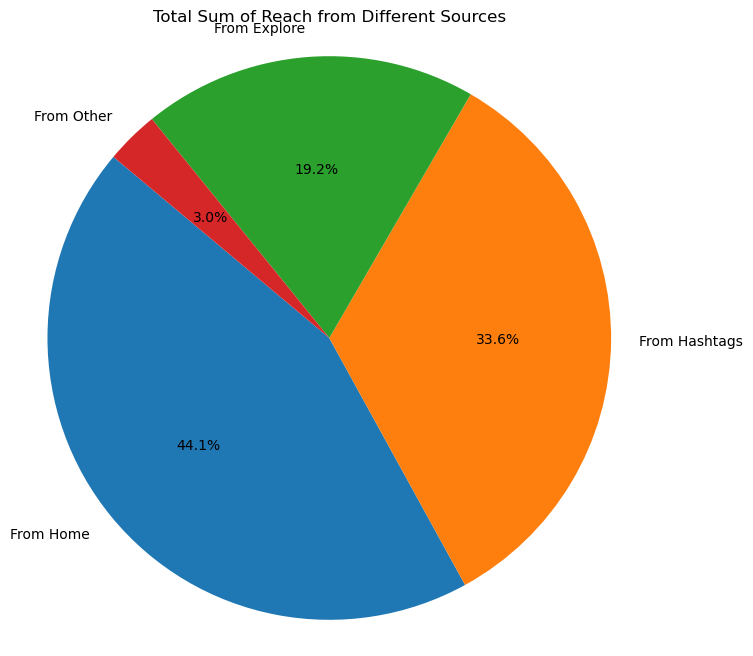

In [7]:
#task7
column_totals = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(column_totals, labels=column_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sum of Reach from Different Sources')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



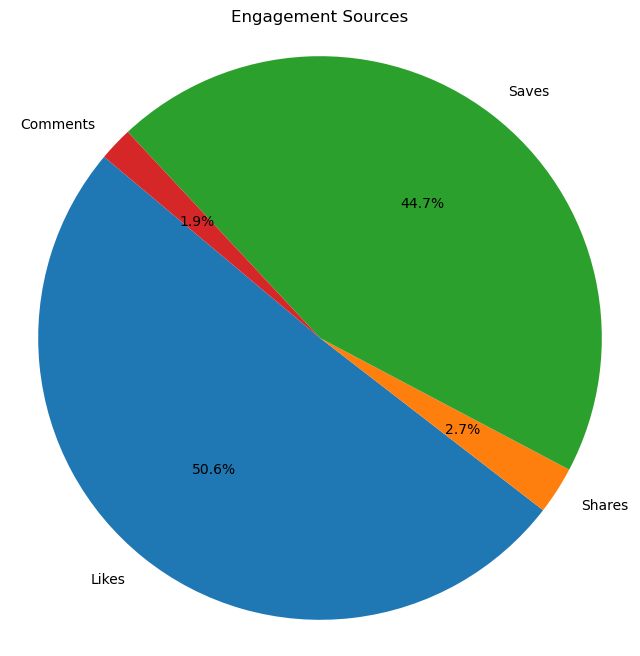

In [8]:
#task8
column_totals = df[['Likes', 'Shares', 'Save', 'Comments']].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(column_totals, labels=column_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Engagement Sources')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

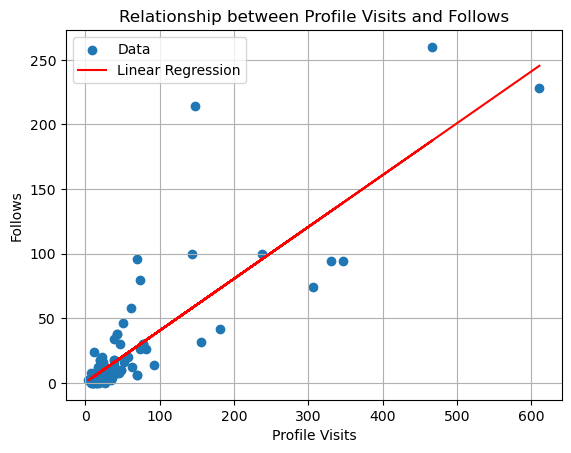

In [9]:
#task9

# Plot a scatter plot to show the relationship between profile visits and follows
plt.scatter(df['Profile Visits'], df['Follows'], label='Data')
plt.title('Relationship between Profile Visits and Follows')
plt.xlabel('Profile Visits')
plt.ylabel('Follows')

# Calculate linear regression line
x = df['Profile Visits']
y = df['Follows']
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
plt.plot(x, poly(x), color='red', label='Linear Regression')

plt.legend()
plt.grid(True)
plt.show()


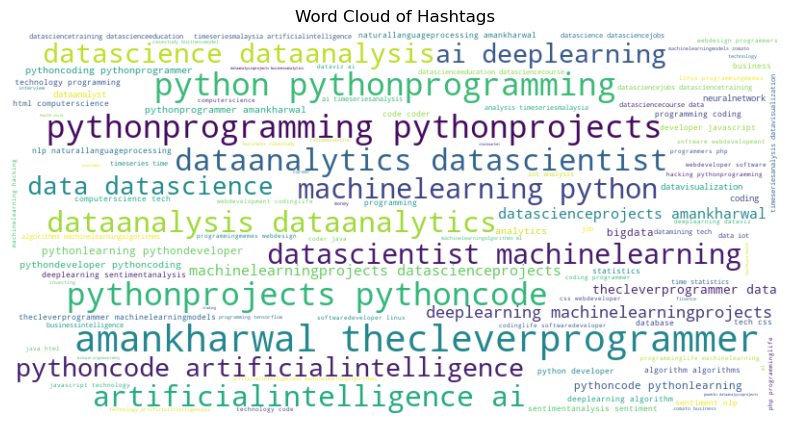

In [10]:
#Task10

# Concatenate all hashtags into a single string
all_hashtags = ' '.join(df['Hashtags'])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Hashtags')
plt.axis('off')  # Turn off axis
plt.show()


C:\Program Files\KMSpico\temp\ipykernel_16348\2140212284.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



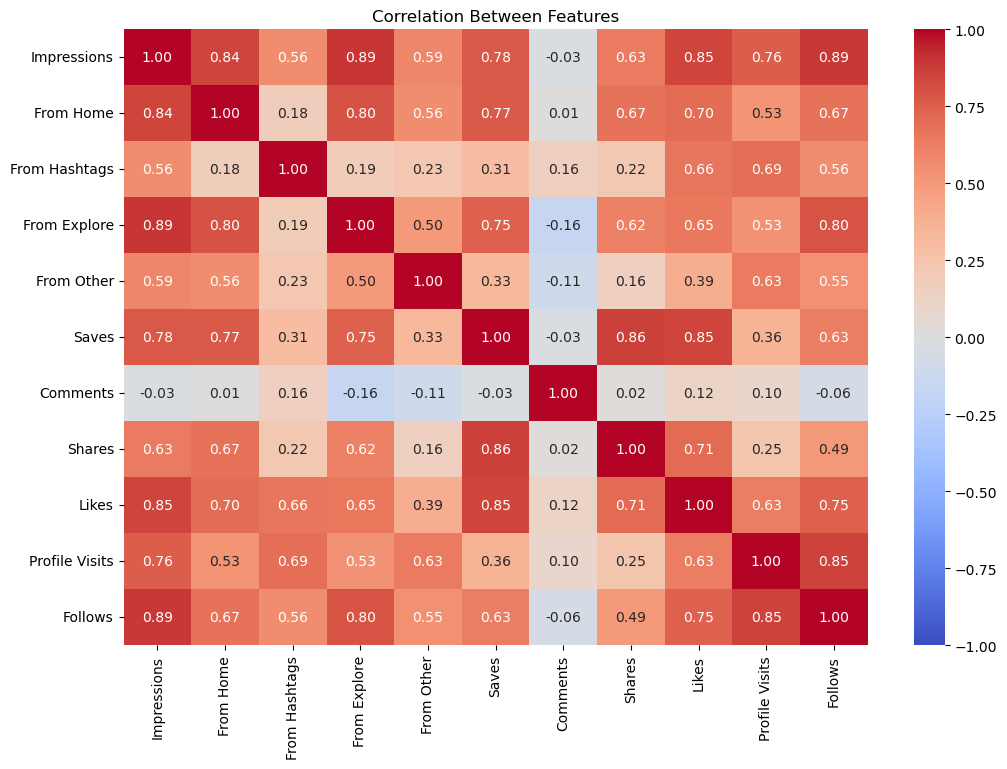

In [11]:
#Task11

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Between Features')
plt.show()


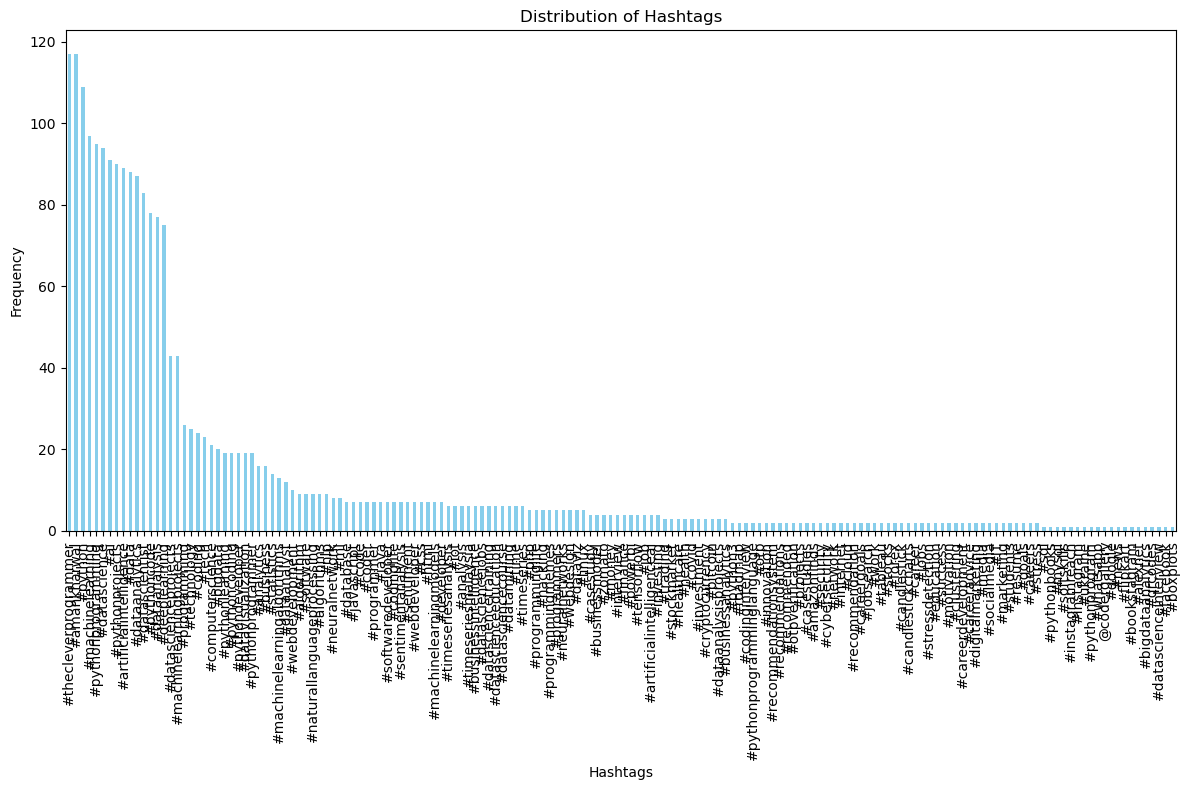

In [12]:
#task12

# Split the hashtags string into individual hashtags
hashtags_list = df['Hashtags'].str.split()

# Flatten the list of lists into a single list of hashtags
all_hashtags = [hashtag for sublist in hashtags_list for hashtag in sublist]

# Count the frequency of each hashtag
hashtags_count = pd.Series(all_hashtags).value_counts()

# Plot the distribution of hashtags
plt.figure(figsize=(12, 8))
hashtags_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Pr

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Pr

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Pr

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Pr

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Pr

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Pr

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Pr

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Pr

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Pr

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Pr

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Pr

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Program Files\KMSpico\temp\ipykernel_16348\3701933306.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Pr

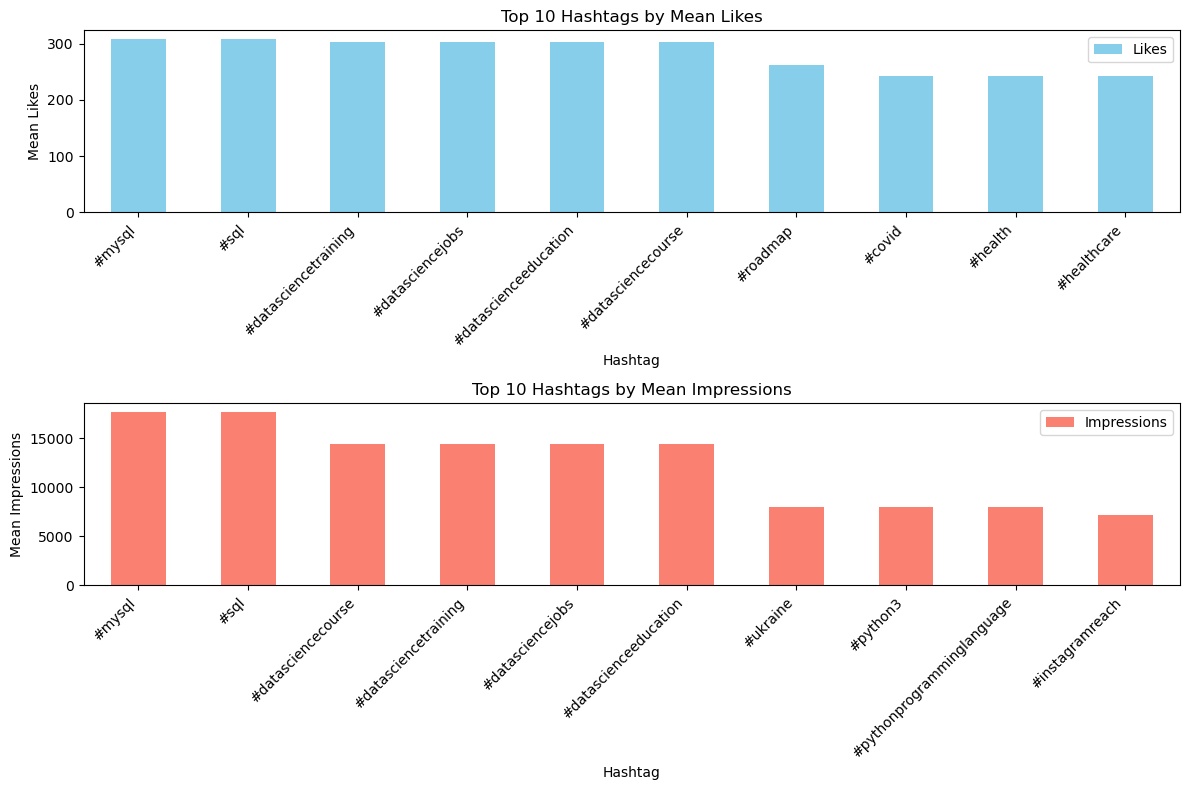

In [13]:
#Task13
# Split the hashtags string into individual hashtags
df['Hashtags'] = df['Hashtags'].str.split()

# Create a new DataFrame to store the likes and impressions for each hashtag
hashtags_df = pd.DataFrame(columns=['Hashtag', 'Likes', 'Impressions'])

# Iterate over each row in the DataFrame and extract likes and impressions for each hashtag
for idx, row in df.iterrows():
    for hashtag in row['Hashtags']:
        hashtags_df = hashtags_df.append({'Hashtag': hashtag, 'Likes': row['Likes'], 'Impressions': row['Impressions']}, ignore_index=True)

# Group by hashtag and calculate the mean likes and impressions for each hashtag
hashtags_grouped = hashtags_df.groupby('Hashtag').mean().reset_index()

# Plot the distribution of likes and impressions for each hashtag
plt.figure(figsize=(12, 8))

# Bar plot for likes
plt.subplot(2, 1, 1)
hashtags_grouped.sort_values(by='Likes', ascending=False).head(10).plot(kind='bar', x='Hashtag', y='Likes', color='skyblue', ax=plt.gca())
plt.title('Top 10 Hashtags by Mean Likes')
plt.xlabel('Hashtag')
plt.ylabel('Mean Likes')
plt.xticks(rotation=45, ha='right')

# Bar plot for impressions
plt.subplot(2, 1, 2)
hashtags_grouped.sort_values(by='Impressions', ascending=False).head(10).plot(kind='bar', x='Hashtag', y='Impressions', color='salmon', ax=plt.gca())
plt.title('Top 10 Hashtags by Mean Impressions')
plt.xlabel('Hashtag')
plt.ylabel('Mean Impressions')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


#Task14
#Key observations from the analysis include:

#1.Descriptive statistics provided insights into the central tendency and distribution of numerical features in the dataset.
#2.Missing values were handled appropriately to ensure accurate analysis results.
#3.The distribution of impressions highlighted the reach of Instagram posts, identifying trends and outliers.
#4.Analyzing reach over time revealed engagement patterns and audience behavior trends.
#5.Metrics like likes, saves, and follows were analyzed over time to understand post performance and audience engagement.
#6.Distribution of reach from different sources helped identify where impressions originated, guiding content optimization strategies.
#7.Correlation analysis identified relationships between features, offering insights into factors influencing engagement metrics.
#8.Distribution of hashtags revealed frequently used hashtags, guiding hashtag strategy and content optimization.
#9.Investigation of likes and impressions by hashtag provided insights into the impact of hashtags on post performance.
#Overall, the analysis provides valuable insights for content creators and marketers to optimize Instagram content, maximize reach, and enhance audience engagement. 